# User Characteristics on Gobike System

## Investigation Overview

In this project I investigated the characteristics of different users in the San Francisco Ford GoBike system. How the different characteristics affected their number of rides and ride duration was the main point of investigation. 

## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in February 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
gobike = pd.read_csv('201902-fordgobike-tripdata1.csv')
# Making a copy for the original dataset
gobike_clean = gobike.copy()

In [3]:
# import datetime package
import datetime


# converting to datetime
gobike_clean['start_time'] = pd.to_datetime(gobike_clean['start_time'])
gobike_clean['end_time'] = pd.to_datetime(gobike_clean['end_time'])

#converting to int
gobike_clean[['member_birth_year']] = gobike_clean[['member_birth_year']].astype(float)
gobike_clean['start_station_id'] = gobike_clean['start_station_id'].astype(str)
gobike_clean['end_station_id'] = gobike_clean['end_station_id'].astype(str)

#converting to category
gobike_clean['bike_share_for_all_trip'] = gobike_clean['bike_share_for_all_trip'].astype('category')
gobike_clean['member_gender'] = gobike_clean['member_gender'].astype('category')
gobike_clean['user_type'] = gobike_clean['user_type'].astype('category')

In [4]:
# deleting rows with no values for member_gender and member_birth_year
gobike_clean.dropna(subset=['member_gender', 'member_birth_year'], inplace=True)
gobike_clean[['member_birth_year']] = gobike_clean[['member_birth_year']].astype(int)


## Ride Duration

We had rides taking outlier durations of more than 50 minutes. However, most rides took below 20 minutes.

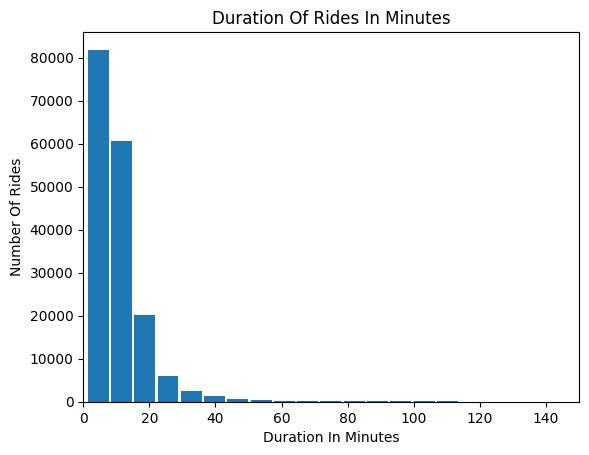

In [5]:
# change duration_sec from seconds to minutes
gobike_clean['duration_min'] = gobike_clean['duration_sec']/60


#Distribution of duration of rides
data = gobike_clean['duration_min']
plt.hist(data , bins = 200 , rwidth=.9)
plt.xlim(0,150)
plt.title('Duration Of Rides In Minutes')
plt.xlabel('Duration In Minutes')
plt.ylabel('Number Of Rides');

## Busiest Day of the Week

Week days had more bike rides than Weekends. Thursday had the highest bike rides and Saurday and Sunday had the lowest..

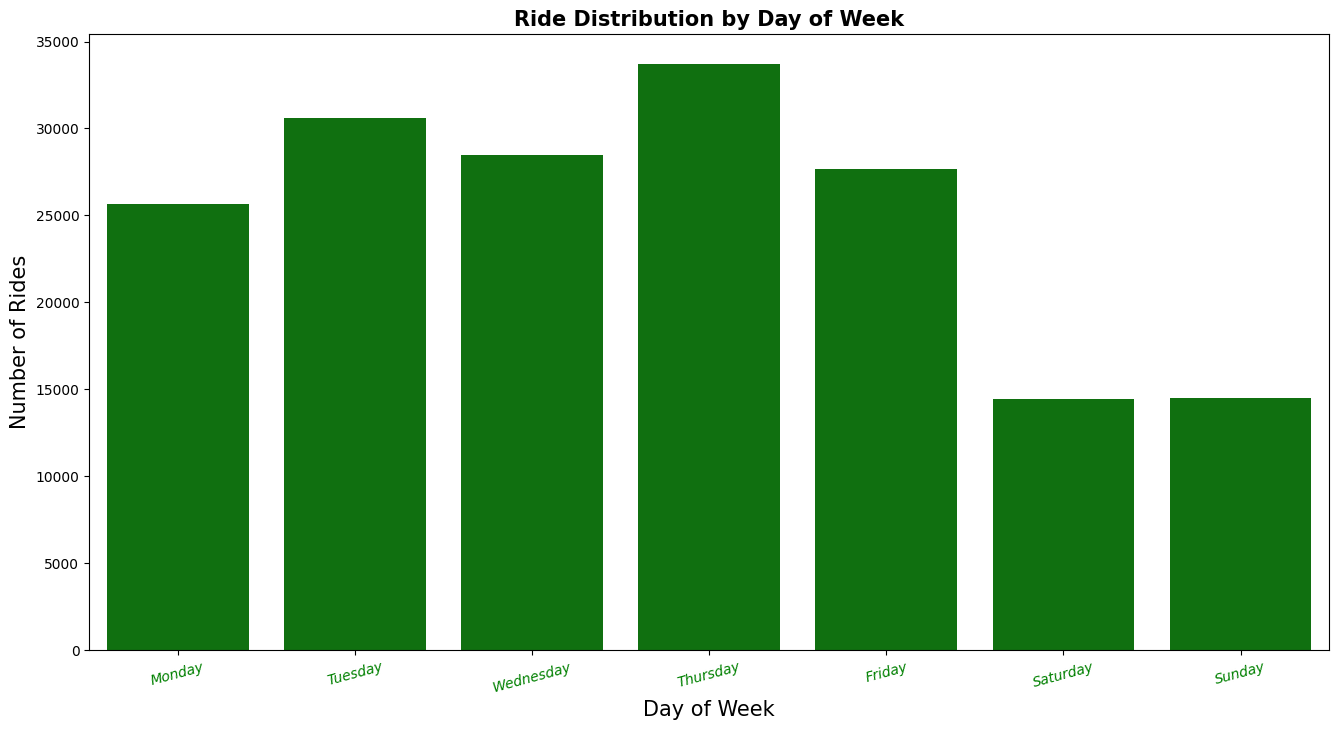

In [6]:
# calculating the weekly rides
weekly_count = gobike_clean.groupby(gobike_clean.start_time.dt.weekday).duration_min.count()
weekly_count = weekly_count.rename_axis('weekday').reset_index(name='count')
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',  'Sunday']

# drawing the graph
plt.figure(figsize=(16,8 ))
plot = sb.barplot(data=weekly_count, x='weekday', y='count', color='green')
plot.set_title('Ride Distribution by Day of Week', fontdict={'size': 15, 'weight': 'bold'})
plot.set_xticks(ticks=weekly_count.index)
plot.set_xlabel('Day of Week', fontdict={'size': 15})
plot.set_xticklabels(labels = day_names, 
                   rotation=15, 
                   fontstyle='italic', 
                   color='green')
plot.set_ylabel('Number of Rides', fontdict={'size': 15})
plt.show()

## Distribution of Categorical Variables

subsciber, Male and No Bike_sharing users were the majority of users in their respective categories.

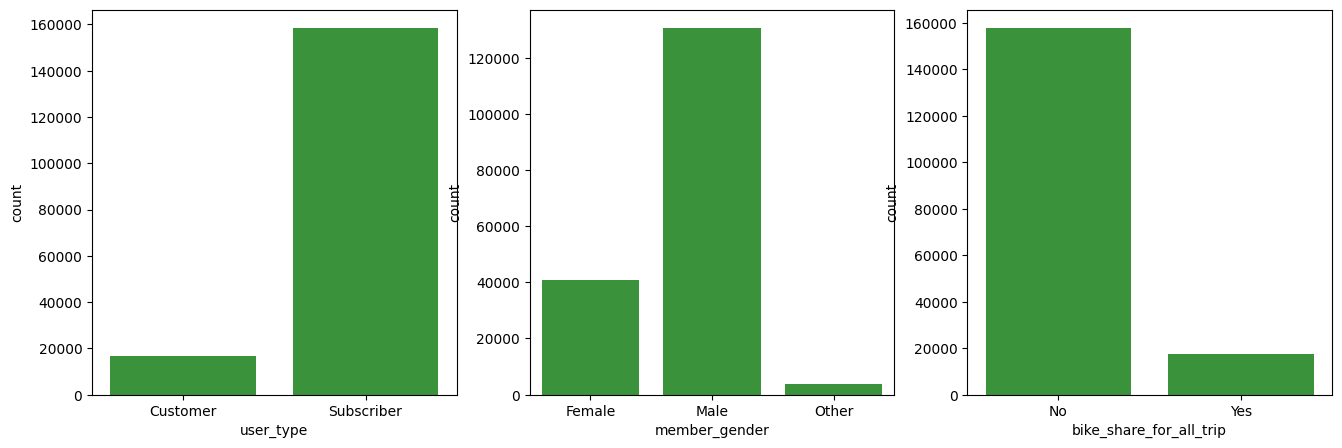

In [7]:
# let's plot all three together to get an idea of each categorical variable's distribution.

fig, ax = plt.subplots(1,3, figsize = [16,5])

default_color = sb.color_palette()[2]
sb.countplot(data = gobike_clean, x = 'user_type', color = default_color, ax = ax[0])
sb.countplot(data = gobike_clean, x = 'member_gender', color = default_color, ax = ax[1])
sb.countplot(data = gobike_clean, x = 'bike_share_for_all_trip', color = default_color, ax = ax[2])

plt.show()

## Age Distribution of Users

Most riders were aged between 20-60 years. There were outlier ages for riders above 100 years.

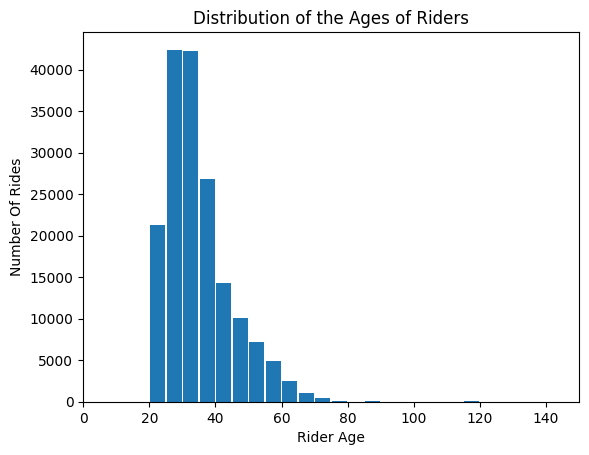

In [8]:
# creating a new age variable 
gobike_clean['age'] = 2019 - gobike_clean['member_birth_year']

# defining the range for the age group
bins = list(range(10, 110, 10))
# append the max item to bins
bins.append(gobike_clean.age.max())

# defining group labels
labels = [f"{str(group)}s" for group in bins[:-1]]


# categorizing the ages
gobike_clean["age_group"] = pd.cut(gobike_clean.age, bins=bins, labels=labels)

# check the age group
gobike_clean.age_group.value_counts()

# deleting the `member_birth_year` variable
gobike_clean.drop(columns='member_birth_year', inplace=True)

# check if the dropping worked
gobike_clean.head(5)


#Distribution of user ages
data = gobike_clean['age']
plt.hist(data , bins = range(20, gobike_clean.age.max() + 5, 5) , rwidth=.9)
plt.xlim(0,150)
plt.title('Distribution of the Ages of Riders')
plt.xlabel('Rider Age')
plt.ylabel('Number Of Rides');

## User type vs Ride duration Relationship

On average customer users had a higher ride duration than Subscribers.

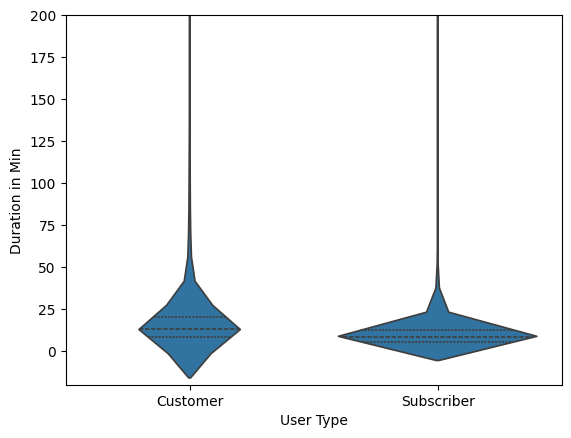

In [9]:
#violin Plot
sb.violinplot(data=gobike_clean, x='user_type', y='duration_min', inner="quartile", bw=.15)
plt.ylim((-20, 200))
plt.xlabel("User Type")
plt.ylabel("Duration in Min");

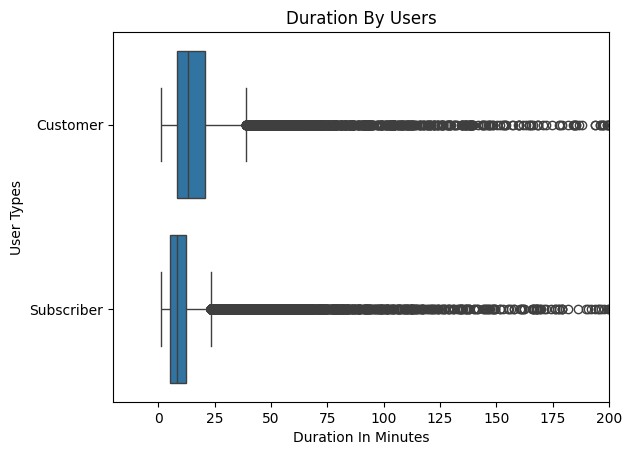

In [10]:
#Boxplot
sb.boxplot(data=gobike_clean, x='duration_min', y='user_type')
plt.xlim(-20, 200)
plt.title('Duration By Users')
plt.xlabel('Duration In Minutes')
plt.ylabel('User Types');

## Distribution of the Average number of Rides over the days of the week by Gender

We can Observe that Male users had the most number of rides every day of the week and their rides varied the most from day to day.Female users had lesser rides and their daily variability was lesser and the other user had the least daily rides with the least variability.

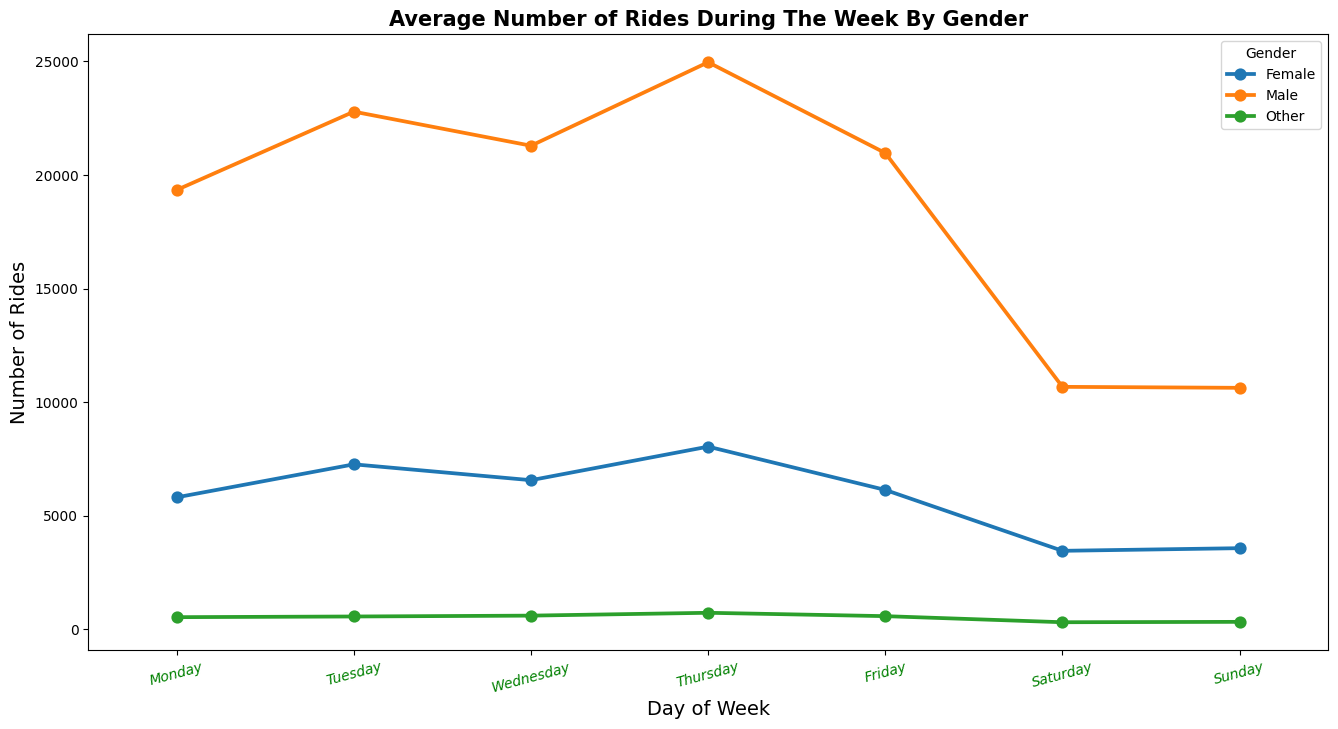

In [11]:
# calculating the Weekday rides
weekly_count = gobike_clean.groupby([gobike_clean.start_time.dt.weekday, 'member_gender']).duration_min.count()
weekly_count = weekly_count.reset_index(name='count')
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',  'Sunday']

#plot
plt.figure(figsize=(16,8 ))
plot = sb.pointplot(data=weekly_count, x='start_time', y='count', hue='member_gender')
plot.set_title('Average Number of Rides During The Week By Gender', fontdict={'size': 15, 'weight': 'bold'})
plot.set_xlabel("Day of Week", fontsize=14)
plot.set_xticklabels(labels = day_names, 
                   rotation=15, 
                   fontstyle='italic', 
                   color='green')
plot.set_ylabel("Number of Rides", fontsize=14)
plt.legend(title="Gender");

In [12]:
# The command below will generate the HTML slideshow. 
!jupyter nbconvert Gobike_Systems_Part2.ipynb --to slides --post serve --no-input --no-prompt 

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbconvert` not found.
